#Lab 3
##Graham Roberts
###8 January 2016

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate as intgrt
import math
%matplotlib inline

In [28]:
class dataFrame326(object):
    
    #def __calcAverage(self, **kwargs): 
    #    if kwargs is not None:
    #        for key, value in kwargs.iteritems():
    #            if (key=='delta' and value==True):
    #                return np.sum(self.__uncertainties)/len(self.__uncertainties)
    #            else:
    #                return np.sum(self.__measurements)/len(self.__measurements)
    #    else:
    #    return np.sum(self.__measurements)/len(self.__measurements)
    
    def __calcAverage(self, **kwargs):
       if ('delta' in kwargs) and kwargs['delta']==True:
            return np.sum(self.__uncertainties)/len(self.__uncertainties)
       else:
            print np.sum(self.__measurements)/len(self.__measurements)
            return np.sum(self.__measurements)/len(self.__measurements)
   
        
    #def __calcSD(self, **kwargs):   
    #    meanSquared, denominator = 1,1
    #    if kwargs is not None:
    #        for key,value in kwargs.iteritems():
    #            if (key=='delta' and value==True):
    #                meanSquared=np.sum([(i-self.__delta_av)**2 for i in self.__uncertainties])
    #                denominator=len(self.__uncertainties)-1
    #            else:
    #                meanSquared=np.sum([(i-self.__av)**2 for i in self.__measurements])
    #                denominator=len(self.__measurements)-1
    #    else:
    #        meanSquared=np.sum([(i-self.__av)**2 for i in self.__measurements])
    #        denominator=len(self.__measurements)-1
    #    return np.sqrt(meanSquared/denominator)
    
    def __calcSD(self, **kwargs):
        meanSquared, denominator = 1,1
        if ('delta' in kwargs) and kwargs['delta']==True:
             meanSquared=np.sum([(i-self.__delta_av)**2 for i in self.__uncertainties])
             denominator=len(self.__uncertainties)-1
        else:
            meanSquared=np.sum([(i-self.__av)**2 for i in self.__measurements])
            denominator=len(self.__measurements)-1
        return np.sqrt(meanSquared/denominator)
            
        
        return np.sqrt(np.sum([(i-calcAverage(arrayLike))**2 for i in arrayLike])/(len(arrayLike)-1))
    
    def __calcWAV(self):
       weights=np.zeros(len(self.__measurements))
       for i in range (0,len(self.__measurements)):
          if self.__uncertainties[i]!=0:
             weights[i]=1./(self.__uncertainties[i])**2
          else:
             weights[i]=1./((self.__sd)**2)
       return float(np.sum(self.__measurements*weights))/np.sum(weights), 1./np.sqrt(np.sum(weights))
   

    def __init__(self, measurements, uncertainties):
        self.__measurements=measurements
        self.__uncertainties=uncertainties
        self.__av=self.__calcAverage()
        self.__delta_av=self.__calcAverage(delta=True)
        self.__sd=self.__calcSD()
        self.__delta_sd=self.__calcSD(delta=True)
        self.__wav=self.__calcWAV()
        self.__min=min(measurements)
        self.__delta_min=min(uncertainties)
        self.__max=max(measurements)
        self.__delta_max=max(uncertainties)
        
    #def mean(self,**kwargs):
    #    print self.__av
    #    if kwargs is not None:
    #        for key, values in kwargs.iteritems():
    #            if (key==delta and value==True):
    #                return self.__delta_av
    #            else:
    #                return self.__av
    #    else:
    #        return self.__av
        
        
    def mean(self, **kwargs):
        if('delta' in kwargs) and kwargs['delta']==True:
            return self.__delta_av
        else:
                    return self.__av
        
    #def sd(self,**kwargs):
    #    if kwargs is not None:
    #        for key, value in kwargs.iteritems():
    #            if (key==delta and value==True):
    #                return self._delta_sd
    #            else:
    #                return self.__sd
    #    else:
    #                return self.__sd
            
    def sd(self, **kwargs):
       if ('delta' in kwargs) and kwargs['delta'] ==True:
          return self.__delta_sd
       else:
                    return self.__sd
        
        
    def wav(self):
        return self.__wav[0], self.__wav[1]
    
    def min(self,**kwargs):
        if ('delta' in kwargs) and kwargs['delta'] ==True:
            return self.__delta_min
        else:
            return self.__min
        
    def max(self,**kwargs):
        if ('delta' in kwargs) and kwargs['delta'] ==True:
            return self.__delta_max
        else:
            return self.__max
    
    def retrieve(self, **kwargs):
        if ('delta' in kwargs) and kwargs['delta'] ==True:
            return self.__uncertainties
        else:
            return self.__measurements

    def Gaussian(self, **kwargs):
       normalizationFactor=0
       if ('delta' in kwargs) and kwargs['delta']==True:
          sequence=np.linspace(int(self.min(delta=True)-1),int(self.max(delta=True)+1),1000)
          normalizationFactor=1./(np.sqrt(2.*np.pi)*self.sd(delta=True))
          exponent=(-((sequence-self.mean(delta=True))**2)/(2.*(self.sd(delta=True)**2)))
       else:
          sequence=np.linspace(int(self.__min-1),int(self.__max+1),1000)
          normalizationFactor=1./(np.sqrt(2.*np.pi)*self.__sd)
          exponent=(-((sequence-self.__av)**2)/(2.*(self.__sd**2))) 
       Gauss = normalizationFactor*np.exp(exponent)
       return sequence, Gauss

In [29]:
diameter, diameterDelta = np.loadtxt("diameter.txt",skiprows=1,unpack=True)
m, massDelta = np.loadtxt("mass.txt",skiprows=1,unpack=True)
#print(diameter)
d = dataFrame326(diameter, diameterDelta)
mass = dataFrame326(m, massDelta)
print d.mean()
print d.sd()
print d.wav()

53.5259701493
1.34014925373
53.5259701493
0.558130156704
(53.641897286959406, 0.00092817718694005293)


In [30]:
def calcGaussian(arrayLike,sequence):
    mean=calcAverage(arrayLike)
    SD=calcSD(arrayLike)
    normalizationFactor=1./(np.sqrt(2.*np.pi)*SD)
    exponent=(-((sequence-mean)**2)/(2.*(SD**2)))
    print intgrt.romb(np.e**exponent*normalizationFactor)
    print normalizationFactor
    return normalizationFactor*np.e**exponent

In [31]:
def Gaussian(dataFrame, **kwargs):
    normalizationFactor=0
    if ('delta' in kwargs) and kwargs['delta']==True:
       sequence=np.linspace(int(dataFrame.min(delta=True)-1),int(dataFrame.max(delta=True)+1),1000)
       normalizationFactor=1./(np.sqrt(2.*np.pi)*dataFrame.sd(delta=True))
       exponent=(-((sequence-dataFrame.mean(delta=True))**2)/(2.*(dataFrame.sd(delta=True)**2)))
                 
    else:
       print int(dataFrame.min(delta=False))
       print int(dataFrame.max(delta=False)+1)
       sequence=np.linspace(int(dataFrame.min(delta=False)-1),int(dataFrame.max(delta=False)+1),1000)
       normalizationFactor=1./(np.sqrt(2.*np.pi)*dataFrame.sd(delta=False))
       exponent=-((sequence-dataFrame.mean(delta=False))**2)/(2.*(dataFrame.sd(delta=False)**2))
    Gauss = normalizationFactor*np.exp(exponent)
    return sequence, Gauss

In [32]:
def Gaussian(self, **kwargs):
    normalizationFactor=0
    if ('delta' in kwargs) and kwargs['delta']==True:
       sequence=np.linspace(int(self.__delta_min-1),int(self.__delta_max+1),1000)
       normalizationFactor=1./(np.sqrt(2.*np.pi)*self.__delta_sd)
       exponent=(-((sequence-self.__delta_av)**2)/(2.*(self.__delta_sd**2)))
    else:
       sequence=np.linspace(int(self.__min-1),int(self.__max+1),1000)
       normalizationFactor=1./(np.sqrt(2.*np.pi)*self.__sd)
       exponent=(-((sequence-self.__av)**2)/(2.*(self.__sd**2)))    

In [33]:
def calcBreaks(dataFrame, **kwargs):
    upper=[]
    lower=[]
    if ('delta' in kwargs) and kwargs['delta']==True:
        values=dataFrame.retrieve(delta=True)
        sd=dataFrame.sd(delta=True)
        mean=dataFrame.mean(delta=True)
        min=dataFrame.min(delta=True)
        max=dataFrame.max(delta=True)
    else:
        values=dataFrame.retrieve(delta=False)
        sd=dataFrame.sd(delta=False)
        mean=dataFrame.mean(delta=False)
        min=dataFrame.min(delta=False)
        max=dataFrame.max(delta=False)
    upper.append(mean+sd/2.)
    lower.append(mean-sd/2.)
    i=mean+sd/2.
    while i < max:
        j=i+sd
        upper=upper+[j]
        i=j
        
        
    i=mean-sd/2.
    while i > min:
        j=i-sd
        lower=lower+[j]
        i=j
    lower=list(reversed(lower))
    print mean
    print lower
    print upper
    return np.array(lower+upper)

50.0
0.490089552239
[-0.95093512417937842, 0.0097479934327445172]
[0.97043111104486734, 1.9311142286569902, 2.8917973462691133, 3.8524804638812364, 4.8131635814933595, 5.7738466991054826]


AttributeError: 'dataFrame326' object has no attribute '__delta_min'

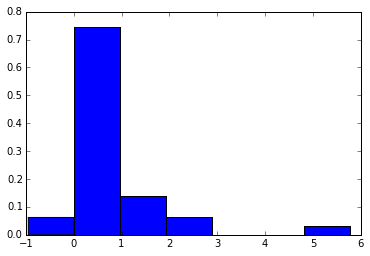

In [34]:
print d.min()
plt.hist(d.retrieve(delta=True),calcBreaks(d,delta=True),normed=True)
plt.plot(Gaussian(d,delta=True)[0],Gaussian(d,delta=True)[1],'r-')
plt.plot(d.Gaussian()[0],d.Gaussian()[1],'m')

AttributeError: 'dataFrame326' object has no attribute '__min'

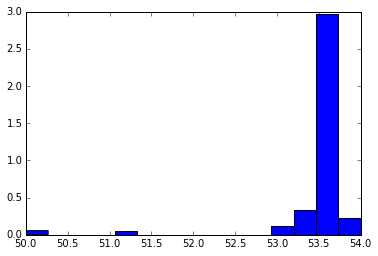

In [48]:
plt.hist(d.retrieve(),15,normed=True)
plt.plot(Gaussian(d)[0],Gaussian(d)[1],'r-')
plt.plot(d.Gaussian()[0],Gaussian()[1],'m')

In [14]:

mass=dataFrame326(np.loadtxt('mass.txt', skiprows=1, unpack=True))

TypeError: __init__() takes exactly 3 arguments (2 given)